In [29]:
import pandas as pd,numpy as np
from glob import glob
import os,re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from multiprocessing import Pool

TE="RefL1_multi"
path = '/cndd/emukamel/DrachevaLiu_PsychENCODE_SCZ/Line1_mC/'

In [30]:
# Load the binned mC data. This was preprocessed in 01.gather_line1_mc
df=pd.read_csv(path+f'/binc_{TE}.mC.age_periods.tsv.gz',sep='\t',header=[0,1,2,3],index_col=[0,1],
#                nrows=10000
              )

In [31]:
%%time

# Remove "multi" from the RefL1_id
df.index.names=['RefL1_id','bin']
dfi = df.index.to_frame()
dfi['RefL1_id']=dfi['RefL1_id'].str.replace('_multi','')
dfi = pd.MultiIndex.from_frame(dfi)
df.index = dfi

CPU times: user 1.13 s, sys: 15.8 ms, total: 1.15 s
Wall time: 1.14 s


In [24]:
%%time
df_coverage=pd.read_csv(path+f'./binc_{TE}.coverage.age_periods.tsv.gz',sep='\t',header=[0,1,2,3],index_col=[0,1],
#                nrows=1000
              )

df_coverage=df_coverage.rename(columns=lambda x: x.replace('coverage-','m'))

CPU times: user 7.25 s, sys: 843 ms, total: 8.09 s
Wall time: 8.09 s


In [32]:
df.columns.names=['ctxt','mctype','sample','celltype']
#df_coverage.columns.names=['ctxt','mctype','sample','celltype']

In [33]:
df

ctxt                     mCGN        mCHN       mCGN       mCHN        mCGN  \
mctype                     BS          BS       OxBS       OxBS        OxBS   
sample            adolescence adolescence late_adult late_adult adolescence   
celltype                 GABA        GABA       GABA       GABA        GABA   
RefL1_id   bin                                                                
RefL1_0    -12800         NaN      0.0000        NaN     0.0000         NaN   
           -12672         NaN      0.0541        NaN        NaN         NaN   
           -12544         NaN      0.0870        NaN     0.0323         NaN   
           -12416         NaN      0.0556        NaN     0.0323         NaN   
           -12288         NaN      0.0714        NaN     0.0682         NaN   
...                       ...         ...        ...        ...         ...   
RefL1_2101  6400          NaN         NaN        NaN        NaN         NaN   
RefL1_6246  8064          NaN         NaN        NaN        NaN         NaN   
RefL1_6774 -4992          NaN         NaN        NaN        NaN         NaN   
           -4864          NaN         NaN        NaN        NaN         NaN   
RefL1_3140  6528          NaN         NaN        NaN        NaN         NaN   

ctxt                     mCHN       mCGN       mCHN       mCGN       mCHN  \
mctype                   OxBS         BS         BS       OxBS       OxBS   
sample            adolescence late_adult late_adult late_child late_child   
celltype                 GABA       GABA       GABA       GABA       GABA   
RefL1_id   bin                                                              
RefL1_0    -12800         NaN        NaN        NaN        NaN        NaN   
           -12672      0.0345        NaN        NaN        NaN        NaN   
           -12544         NaN        NaN        NaN        NaN        NaN   
           -12416         NaN        NaN     0.0000        NaN        NaN   
           -12288      0.0500        NaN     0.0909        NaN       0.05   
...                       ...        ...        ...        ...        ...   
RefL1_2101  6400          NaN        NaN        NaN        NaN        NaN   
RefL1_6246  8064          NaN        NaN        NaN        NaN        NaN   
RefL1_6774 -4992          NaN        NaN        NaN        NaN        NaN   
           -4864          NaN        NaN        NaN        NaN        NaN   
RefL1_3140  6528          NaN        NaN        NaN        NaN        NaN   

ctxt               ...  mCGN    mCHN  mCGN    mCHN  mCGN  mCHN        mCGN  \
mctype             ...    BS      BS    BS      BS  OxBS  OxBS        OxBS   
sample             ... adult   adult adult   adult adult adult early_child   
celltype           ...   GLU     GLU  GABA    GABA  GABA  GABA        GABA   
RefL1_id   bin     ...                                                       
RefL1_0    -12800  ...   NaN     NaN   NaN  0.0000   NaN   0.0         NaN   
           -12672  ...   NaN     NaN   NaN  0.0435   NaN   0.0         NaN   
           -12544  ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
           -12416  ...   NaN  0.0000   NaN     NaN   NaN   NaN         NaN   
           -12288  ...   NaN  0.0667   NaN     NaN   NaN   NaN         NaN   
...                ...   ...     ...   ...     ...   ...   ...         ...   
RefL1_2101  6400   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_6246  8064   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
RefL1_6774 -4992   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
           -4864   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_3140  6528   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   

ctxt                     mCHN       mCGN       mCHN  
mctype                   OxBS         BS         BS  
sample            early_child late_child late_child  
celltype                 GABA       GABA       GABA  
RefL1_id   bin                       

In [35]:
df

ctxt                     mCGN        mCHN       mCGN       mCHN        mCGN  \
mctype                     BS          BS       OxBS       OxBS        OxBS   
sample            adolescence adolescence late_adult late_adult adolescence   
celltype                 GABA        GABA       GABA       GABA        GABA   
RefL1_id   bin                                                                
RefL1_0    -12800         NaN      0.0000        NaN     0.0000         NaN   
           -12672         NaN      0.0541        NaN        NaN         NaN   
           -12544         NaN      0.0870        NaN     0.0323         NaN   
           -12416         NaN      0.0556        NaN     0.0323         NaN   
           -12288         NaN      0.0714        NaN     0.0682         NaN   
...                       ...         ...        ...        ...         ...   
RefL1_2101  6400          NaN         NaN        NaN        NaN         NaN   
RefL1_6246  8064          NaN         NaN        NaN        NaN         NaN   
RefL1_6774 -4992          NaN         NaN        NaN        NaN         NaN   
           -4864          NaN         NaN        NaN        NaN         NaN   
RefL1_3140  6528          NaN         NaN        NaN        NaN         NaN   

ctxt                     mCHN       mCGN       mCHN       mCGN       mCHN  \
mctype                   OxBS         BS         BS       OxBS       OxBS   
sample            adolescence late_adult late_adult late_child late_child   
celltype                 GABA       GABA       GABA       GABA       GABA   
RefL1_id   bin                                                              
RefL1_0    -12800         NaN        NaN        NaN        NaN        NaN   
           -12672      0.0345        NaN        NaN        NaN        NaN   
           -12544         NaN        NaN        NaN        NaN        NaN   
           -12416         NaN        NaN     0.0000        NaN        NaN   
           -12288      0.0500        NaN     0.0909        NaN       0.05   
...                       ...        ...        ...        ...        ...   
RefL1_2101  6400          NaN        NaN        NaN        NaN        NaN   
RefL1_6246  8064          NaN        NaN        NaN        NaN        NaN   
RefL1_6774 -4992          NaN        NaN        NaN        NaN        NaN   
           -4864          NaN        NaN        NaN        NaN        NaN   
RefL1_3140  6528          NaN        NaN        NaN        NaN        NaN   

ctxt               ...  mCGN    mCHN  mCGN    mCHN  mCGN  mCHN        mCGN  \
mctype             ...    BS      BS    BS      BS  OxBS  OxBS        OxBS   
sample             ... adult   adult adult   adult adult adult early_child   
celltype           ...   GLU     GLU  GABA    GABA  GABA  GABA        GABA   
RefL1_id   bin     ...                                                       
RefL1_0    -12800  ...   NaN     NaN   NaN  0.0000   NaN   0.0         NaN   
           -12672  ...   NaN     NaN   NaN  0.0435   NaN   0.0         NaN   
           -12544  ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
           -12416  ...   NaN  0.0000   NaN     NaN   NaN   NaN         NaN   
           -12288  ...   NaN  0.0667   NaN     NaN   NaN   NaN         NaN   
...                ...   ...     ...   ...     ...   ...   ...         ...   
RefL1_2101  6400   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_6246  8064   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
RefL1_6774 -4992   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
           -4864   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_3140  6528   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   

ctxt                     mCHN       mCGN       mCHN  
mctype                   OxBS         BS         BS  
sample            early_child late_child late_child  
celltype                 GABA       GABA       GABA  
RefL1_id   bin                       

In [37]:
df=df.reorder_levels(['mctype','ctxt','sample','celltype'],axis=1)
df

mctype                     BS                   OxBS                         \
ctxt                     mCGN        mCHN       mCGN       mCHN        mCGN   
sample            adolescence adolescence late_adult late_adult adolescence   
celltype                 GABA        GABA       GABA       GABA        GABA   
RefL1_id   bin                                                                
RefL1_0    -12800         NaN      0.0000        NaN     0.0000         NaN   
           -12672         NaN      0.0541        NaN        NaN         NaN   
           -12544         NaN      0.0870        NaN     0.0323         NaN   
           -12416         NaN      0.0556        NaN     0.0323         NaN   
           -12288         NaN      0.0714        NaN     0.0682         NaN   
...                       ...         ...        ...        ...         ...   
RefL1_2101  6400          NaN         NaN        NaN        NaN         NaN   
RefL1_6246  8064          NaN         NaN        NaN        NaN         NaN   
RefL1_6774 -4992          NaN         NaN        NaN        NaN         NaN   
           -4864          NaN         NaN        NaN        NaN         NaN   
RefL1_3140  6528          NaN         NaN        NaN        NaN         NaN   

mctype                                BS                  OxBS             \
ctxt                     mCHN       mCGN       mCHN       mCGN       mCHN   
sample            adolescence late_adult late_adult late_child late_child   
celltype                 GABA       GABA       GABA       GABA       GABA   
RefL1_id   bin                                                              
RefL1_0    -12800         NaN        NaN        NaN        NaN        NaN   
           -12672      0.0345        NaN        NaN        NaN        NaN   
           -12544         NaN        NaN        NaN        NaN        NaN   
           -12416         NaN        NaN     0.0000        NaN        NaN   
           -12288      0.0500        NaN     0.0909        NaN       0.05   
...                       ...        ...        ...        ...        ...   
RefL1_2101  6400          NaN        NaN        NaN        NaN        NaN   
RefL1_6246  8064          NaN        NaN        NaN        NaN        NaN   
RefL1_6774 -4992          NaN        NaN        NaN        NaN        NaN   
           -4864          NaN        NaN        NaN        NaN        NaN   
RefL1_3140  6528          NaN        NaN        NaN        NaN        NaN   

mctype             ...    BS                        OxBS                    \
ctxt               ...  mCGN    mCHN  mCGN    mCHN  mCGN  mCHN        mCGN   
sample             ... adult   adult adult   adult adult adult early_child   
celltype           ...   GLU     GLU  GABA    GABA  GABA  GABA        GABA   
RefL1_id   bin     ...                                                       
RefL1_0    -12800  ...   NaN     NaN   NaN  0.0000   NaN   0.0         NaN   
           -12672  ...   NaN     NaN   NaN  0.0435   NaN   0.0         NaN   
           -12544  ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
           -12416  ...   NaN  0.0000   NaN     NaN   NaN   NaN         NaN   
           -12288  ...   NaN  0.0667   NaN     NaN   NaN   NaN         NaN   
...                ...   ...     ...   ...     ...   ...   ...         ...   
RefL1_2101  6400   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_6246  8064   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
RefL1_6774 -4992   ...   NaN     NaN   NaN     NaN   NaN   0.0         NaN   
           -4864   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   
RefL1_3140  6528   ...   NaN     NaN   NaN     NaN   NaN   NaN         NaN   

mctype                                BS             
ctxt                     mCHN       mCGN       mCHN  
sample            early_child late_child late_child  
celltype                 GABA       GABA       GABA  
RefL1_id   bin                       

In [38]:
df['OxBS']

ctxt                    mCGN       mCHN        mCGN        mCHN       mCGN  \
sample            late_adult late_adult adolescence adolescence late_child   
celltype                GABA       GABA        GABA        GABA       GABA   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN     0.0000         NaN         NaN        NaN   
           -12672        NaN        NaN         NaN      0.0345        NaN   
           -12544        NaN     0.0323         NaN         NaN        NaN   
           -12416        NaN     0.0323         NaN         NaN        NaN   
           -12288        NaN     0.0682         NaN      0.0500        NaN   
...                      ...        ...         ...         ...        ...   
RefL1_2101  6400         NaN        NaN         NaN         NaN        NaN   
RefL1_6246  8064         NaN        NaN         NaN         NaN        NaN   
RefL1_6774 -4992         NaN        NaN         NaN         NaN        NaN   
           -4864         NaN        NaN         NaN         NaN        NaN   
RefL1_3140  6528         NaN        NaN         NaN         NaN        NaN   

ctxt                    mCHN       mCGN       mCHN        mCGN        mCHN  \
sample            late_child late_adult late_adult early_child early_child   
celltype                GABA        GLU        GLU         GLU         GLU   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN        NaN        NaN         NaN         NaN   
           -12672        NaN        NaN        NaN         NaN      0.0370   
           -12544        NaN        NaN        NaN         NaN      0.0000   
           -12416        NaN        NaN        NaN         NaN         NaN   
           -12288       0.05        NaN        NaN         NaN      0.0161   
...                      ...        ...        ...         ...         ...   
RefL1_2101  6400         NaN        NaN        NaN         NaN         NaN   
RefL1_6246  8064         NaN        NaN        NaN         NaN         NaN   
RefL1_6774 -4992         NaN        NaN        NaN         NaN         NaN   
           -4864         NaN        NaN        NaN         NaN         NaN   
RefL1_3140  6528         NaN        NaN        NaN         NaN         NaN   

ctxt               ...       mCGN       mCHN        mCGN        mCHN    mCGN  \
sample             ... late_child late_child adolescence adolescence infancy   
celltype           ...        GLU        GLU         GLU         GLU     GLU   
RefL1_id   bin     ...                                                         
RefL1_0    -12800  ...        NaN        NaN         NaN         NaN     NaN   
           -12672  ...        NaN        NaN         NaN         NaN     NaN   
           -12544  ...        NaN        NaN         NaN         0.0     NaN   
           -12416  ...        NaN        0.0         NaN         0.0     NaN   
           -12288  ...        NaN        0.0         NaN         0.0     NaN   
...                ...        ...        ...         ...         ...     ...   
RefL1_2101  6400   ...        NaN        NaN         NaN         NaN     NaN   
RefL1_6246  8064   ...        NaN        NaN         NaN         NaN     NaN   
RefL1_6774 -4992   ...        NaN        NaN         NaN         NaN     NaN   
           -4864   ...        NaN        NaN         NaN         NaN     NaN   
RefL1_3140  6528   ...        NaN        NaN         NaN         NaN     NaN   

ctxt                 mCHN  mCGN  mCHN        mCGN        mCHN  
sample            infancy adult adult early_child early_child  
celltype              GLU  GABA  GABA        GABA        GABA  
RefL1_id   bin                                                 
RefL1_0    -12800     NaN   NaN   0.0         NaN      0.0286  
           -12672     NaN   NaN   0.0         NaN         NaN  
           -12544     NaN   NaN   NaN         NaN         NaN  
         

In [39]:
# Calculate hmC (BS-OxBS)
df=df.reorder_levels(['mctype','ctxt','sample','celltype'],axis=1)
df=pd.concat({'mC':df['OxBS'], 'hmC':df['BS']-df['OxBS']},axis=1,names=['mctype'])

In [40]:
df

mctype                    mC                                                \
ctxt                    mCGN       mCHN        mCGN        mCHN       mCGN   
sample            late_adult late_adult adolescence adolescence late_child   
celltype                GABA       GABA        GABA        GABA       GABA   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN     0.0000         NaN         NaN        NaN   
           -12672        NaN        NaN         NaN      0.0345        NaN   
           -12544        NaN     0.0323         NaN         NaN        NaN   
           -12416        NaN     0.0323         NaN         NaN        NaN   
           -12288        NaN     0.0682         NaN      0.0500        NaN   
...                      ...        ...         ...         ...        ...   
RefL1_2101  6400         NaN        NaN         NaN         NaN        NaN   
RefL1_6246  8064         NaN        NaN         NaN         NaN        NaN   
RefL1_6774 -4992         NaN        NaN         NaN         NaN        NaN   
           -4864         NaN        NaN         NaN         NaN        NaN   
RefL1_3140  6528         NaN        NaN         NaN         NaN        NaN   

mctype                                                                      \
ctxt                    mCHN       mCGN       mCHN        mCGN        mCHN   
sample            late_child late_adult late_adult early_child early_child   
celltype                GABA        GLU        GLU         GLU         GLU   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN        NaN        NaN         NaN         NaN   
           -12672        NaN        NaN        NaN         NaN      0.0370   
           -12544        NaN        NaN        NaN         NaN      0.0000   
           -12416        NaN        NaN        NaN         NaN         NaN   
           -12288       0.05        NaN        NaN         NaN      0.0161   
...                      ...        ...        ...         ...         ...   
RefL1_2101  6400         NaN        NaN        NaN         NaN         NaN   
RefL1_6246  8064         NaN        NaN        NaN         NaN         NaN   
RefL1_6774 -4992         NaN        NaN        NaN         NaN         NaN   
           -4864         NaN        NaN        NaN         NaN         NaN   
RefL1_3140  6528         NaN        NaN        NaN         NaN         NaN   

mctype             ...     hmC                                          \
ctxt               ...    mCHN                                           
sample             ...   adult         early_child         infancy       
celltype           ...    GABA     GLU        GABA     GLU    GABA GLU   
RefL1_id   bin     ...                                                   
RefL1_0    -12800  ...  0.0000     NaN         NaN     NaN     NaN NaN   
           -12672  ...  0.0435     NaN         NaN     NaN     NaN NaN   
           -12544  ...     NaN     NaN         NaN  0.0000     NaN NaN   
           -12416  ...     NaN  0.0000         NaN     NaN     NaN NaN   
           -12288  ...     NaN  0.0126         NaN -0.0161     NaN NaN   
...                ...     ...     ...         ...     ...     ...  ..   
RefL1_2101  6400   ...     NaN     NaN         NaN     NaN     NaN NaN   
RefL1_6246  8064   ...     NaN     NaN         NaN     NaN     NaN NaN   
RefL1_6774 -4992   ...     NaN     NaN         NaN     NaN     NaN NaN   
           -4864   ...     NaN     NaN         NaN     NaN     NaN NaN   
RefL1_3140  6528   ...     NaN     NaN         NaN     NaN     NaN NaN   

mctype                                           
ctxt                                             
sample            late_adult     late_child      
celltype                GABA GLU       GABA GLU  
RefL1_id   bin                                   
RefL1_0    -12800        NaN NaN        NaN NaN  
           -12672

In [41]:
for d in [df, df_coverage]:
  dfi=d.columns.to_frame()
  dfi['ctxt'] = dfi['ctxt']+'-'+dfi['mctype']
  dfi=dfi.drop(columns='mctype')
  d.columns=pd.MultiIndex.from_frame(dfi)

In [42]:
d

ctxt                        mCGN-BS     mCHN-BS  mCGN-OxBS  mCHN-OxBS  \
sample                  adolescence adolescence late_adult late_adult   
celltype                       GABA        GABA       GABA       GABA   
RefL1_multi_id   bin                                                    
RefL1_multi_0    -12800           0           8          0          9   
                 -12672           0          37          0          4   
                 -12544           1          23          1         31   
                 -12416           0          18          0         31   
                 -12288           0          42          0         44   
...                             ...         ...        ...        ...   
RefL1_multi_2101  6400            0           0          0          0   
RefL1_multi_6246  8064            0           0          0          0   
RefL1_multi_6774 -4992            0           0          0          0   
                 -4864            0           0          0          0   
RefL1_multi_3140  6528            0           0          0          0   

ctxt                      mCGN-OxBS   mCHN-OxBS    mCGN-BS    mCHN-BS  \
sample                  adolescence adolescence late_adult late_adult   
celltype                       GABA        GABA       GABA       GABA   
RefL1_multi_id   bin                                                    
RefL1_multi_0    -12800           0           0          0          0   
                 -12672           0          29          0          0   
                 -12544           1           1          0          0   
                 -12416           0           0          0         11   
                 -12288           0          20          0         22   
...                             ...         ...        ...        ...   
RefL1_multi_2101  6400            0           0          0          0   
RefL1_multi_6246  8064            0           0          0          0   
RefL1_multi_6774 -4992            0           0          0          0   
                 -4864            0           0          0          0   
RefL1_multi_3140  6528            0           0          0          0   

ctxt                     mCGN-OxBS  mCHN-OxBS  ... mCGN-BS mCHN-BS mCGN-BS  \
sample                  late_child late_child  ...   adult   adult   adult   
celltype                      GABA       GABA  ...     GLU     GLU    GABA   
RefL1_multi_id   bin                           ...                           
RefL1_multi_0    -12800          0          0  ...       0       0       0   
                 -12672          0          0  ...       0       0       0   
                 -12544          0          0  ...       0       0       0   
                 -12416          0          3  ...       0      10       0   
                 -12288          0         20  ...       0      15       0   
...                            ...        ...  ...     ...     ...     ...   
RefL1_multi_2101  6400           0          0  ...       0       0       0   
RefL1_multi_6246  8064           0          0  ...       0       0       0   
RefL1_multi_6774 -4992           0          0  ...       0       0       0   
                 -4864           0          0  ...       0       0       0   
RefL1_multi_3140  6528           0          0  ...       0       0       0   

ctxt                    mCHN-BS mCGN-OxBS mCHN-OxBS   mCGN-OxBS   mCHN-OxBS  \
sample                    adult     adult     adult early_child early_child   
celltype                   GABA      GABA      GABA        GABA        GABA   
RefL1_multi_id   bin                                                          
RefL1_multi_0    -12800      37         0        44           0          35   
                 -12672      23         0        12           0           0   
                 -12544       0         0         0           0           0   
                 -12416       0         0         0           0           0   
     


# Characterize the KNRGL loci

In [7]:
TE_bed=pd.read_csv(f'xtea_{TE}_all_KNRGL.bed',sep='\t',
                   names=['chr','start','end','strand','svlen','RefL1_ID','-','L1 class','5prime']
                  )

In [8]:
# TE_bed['TE_id']=TE_bed['TE_id_samples'].str.extract(f'({TE}_[0-9]+)')
# TE_bed['samples']=TE_bed['TE_id_samples'].str.extract(f'{TE}_[0-9]+:(.*)')

plt.figure(figsize=(4,2))
TE_bed['svlen'].plot(kind='hist',bins=100)
plt.xlabel(f'Length of {TE} insertion (SVLEN)')
plt.grid(True)

In [9]:
TE_bed['full length'] = (TE_bed['svlen']>200)&(TE_bed['svlen']<300)

In [9]:
l1_bed=pd.read_csv(path+f'xtea_{TE}_all_KNRGL.bed',sep='\t',
                   names=['chr', 'start', 'end', 'strand', 'evol_age', 'RefL1_id', 'score','L1 class','5prime'],
                  index_col='RefL1_id')
l1_bed.index = l1_bed.index.str.replace('_multi','')
l1_bed

chr      start        end strand  evol_age score L1 class  \
RefL1_id                                                                 
RefL1_0     chr1     440936     447357      +    6421.0     .    L1PA7   
RefL1_1     chr1     675912     682333      +    6421.0     .    L1PA7   
RefL1_2     chr1    4034646    4039971      +    5325.0     .    L1PB1   
RefL1_3     chr1    7411758    7417922      -    6164.0     .    L1PA4   
RefL1_4     chr1   14355445   14361840      -    6395.0     .    L1PA7   
...          ...        ...        ...    ...       ...   ...      ...   
RefL1_9956  chrX  155567854  155573980      +    6126.0     .    L1PA3   
RefL1_9957  chrX  155722806  155728823      -    6017.0     .    L1PA6   
RefL1_9958  chrX  155808795  155815006      +    6211.0     .    L1PA6   
RefL1_9959  chrX  155912364  155918771      -    6407.0     .    L1PA7   
RefL1_9960  chrX  155930718  155936823      -    6105.0     .    L1PA5   

               5prime  
RefL1_id               
RefL1_0        440936  
RefL1_1        675912  
RefL1_2       4034646  
RefL1_3       7417921  
RefL1_4      14361839  
...               ...  
RefL1_9956  155567854  
RefL1_9957  155728822  
RefL1_9958  155808795  
RefL1_9959  155918770  
RefL1_9960  155936822  

[9961 rows x 8 columns]

# Plot mC around reference L1 sites

In [43]:
%%time
# Coarse-grain the original bins (128bp)
binsize_show = 128
dfu=df.copy().reset_index('bin')
dfu['bin']=np.floor(dfu['bin']/binsize_show)*binsize_show
dfu=dfu.groupby(['RefL1_id','bin']).mean()

<timed exec>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


CPU times: user 2.92 s, sys: 2.85 s, total: 5.77 s
Wall time: 6.81 s


In [45]:
df

ctxt                 mCGN-mC    mCHN-mC     mCGN-mC     mCHN-mC    mCGN-mC  \
sample            late_adult late_adult adolescence adolescence late_child   
celltype                GABA       GABA        GABA        GABA       GABA   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN     0.0000         NaN         NaN        NaN   
           -12672        NaN        NaN         NaN      0.0345        NaN   
           -12544        NaN     0.0323         NaN         NaN        NaN   
           -12416        NaN     0.0323         NaN         NaN        NaN   
           -12288        NaN     0.0682         NaN      0.0500        NaN   
...                      ...        ...         ...         ...        ...   
RefL1_2101  6400         NaN        NaN         NaN         NaN        NaN   
RefL1_6246  8064         NaN        NaN         NaN         NaN        NaN   
RefL1_6774 -4992         NaN        NaN         NaN         NaN        NaN   
           -4864         NaN        NaN         NaN         NaN        NaN   
RefL1_3140  6528         NaN        NaN         NaN         NaN        NaN   

ctxt                 mCHN-mC    mCGN-mC    mCHN-mC     mCGN-mC     mCHN-mC  \
sample            late_child late_adult late_adult early_child early_child   
celltype                GABA        GLU        GLU         GLU         GLU   
RefL1_id   bin                                                               
RefL1_0    -12800        NaN        NaN        NaN         NaN         NaN   
           -12672        NaN        NaN        NaN         NaN      0.0370   
           -12544        NaN        NaN        NaN         NaN      0.0000   
           -12416        NaN        NaN        NaN         NaN         NaN   
           -12288       0.05        NaN        NaN         NaN      0.0161   
...                      ...        ...        ...         ...         ...   
RefL1_2101  6400         NaN        NaN        NaN         NaN         NaN   
RefL1_6246  8064         NaN        NaN        NaN         NaN         NaN   
RefL1_6774 -4992         NaN        NaN        NaN         NaN         NaN   
           -4864         NaN        NaN        NaN         NaN         NaN   
RefL1_3140  6528         NaN        NaN        NaN         NaN         NaN   

ctxt               ... mCHN-hmC                                          \
sample             ...    adult         early_child         infancy       
celltype           ...     GABA     GLU        GABA     GLU    GABA GLU   
RefL1_id   bin     ...                                                    
RefL1_0    -12800  ...   0.0000     NaN         NaN     NaN     NaN NaN   
           -12672  ...   0.0435     NaN         NaN     NaN     NaN NaN   
           -12544  ...      NaN     NaN         NaN  0.0000     NaN NaN   
           -12416  ...      NaN  0.0000         NaN     NaN     NaN NaN   
           -12288  ...      NaN  0.0126         NaN -0.0161     NaN NaN   
...                ...      ...     ...         ...     ...     ...  ..   
RefL1_2101  6400   ...      NaN     NaN         NaN     NaN     NaN NaN   
RefL1_6246  8064   ...      NaN     NaN         NaN     NaN     NaN NaN   
RefL1_6774 -4992   ...      NaN     NaN         NaN     NaN     NaN NaN   
           -4864   ...      NaN     NaN         NaN     NaN     NaN NaN   
RefL1_3140  6528   ...      NaN     NaN         NaN     NaN     NaN NaN   

ctxt                                             
sample            late_adult     late_child      
celltype                GABA GLU       GABA GLU  
RefL1_id   bin                                   
RefL1_0    -12800        NaN NaN        NaN NaN  
           -12672        NaN NaN        NaN NaN  
           -12544        NaN NaN        NaN NaN  
           -12416    -0.0323 NaN        NaN NaN  
           -12288     0.0227 NaN        NaN NaN  
...                      ...  ..        ...  ..  
RefL1_2101  6400         NaN NaN

In [44]:
dfu

ctxt                  mCGN-mC    mCHN-mC     mCGN-mC     mCHN-mC    mCGN-mC  \
sample             late_adult late_adult adolescence adolescence late_child   
celltype                 GABA       GABA        GABA        GABA       GABA   
RefL1_id  bin                                                                 
RefL1_0   -12800.0        NaN     0.0000         NaN         NaN        NaN   
          -12672.0        NaN        NaN         NaN      0.0345        NaN   
          -12544.0        NaN     0.0323         NaN         NaN        NaN   
          -12416.0        NaN     0.0323         NaN         NaN        NaN   
          -12288.0        NaN     0.0682         NaN      0.0500        NaN   
...                       ...        ...         ...         ...        ...   
RefL1_999  12160.0     0.5714     0.0646      0.5821      0.0643     0.7407   
           12288.0        NaN     0.0500         NaN      0.0575        NaN   
           12416.0        NaN     0.0440         NaN      0.0551        NaN   
           12544.0        NaN     0.0553         NaN      0.0713        NaN   
           12672.0     0.4821     0.0782      0.4048      0.0799     0.5161   

ctxt                  mCHN-mC    mCGN-mC    mCHN-mC     mCGN-mC     mCHN-mC  \
sample             late_child late_adult late_adult early_child early_child   
celltype                 GABA        GLU        GLU         GLU         GLU   
RefL1_id  bin                                                                 
RefL1_0   -12800.0        NaN        NaN        NaN         NaN         NaN   
          -12672.0        NaN        NaN        NaN         NaN      0.0370   
          -12544.0        NaN        NaN        NaN         NaN      0.0000   
          -12416.0        NaN        NaN        NaN         NaN         NaN   
          -12288.0     0.0500        NaN        NaN         NaN      0.0161   
...                       ...        ...        ...         ...         ...   
RefL1_999  12160.0     0.0791     0.5658     0.0666      0.7246      0.0391   
           12288.0     0.0690        NaN     0.0522         NaN      0.0336   
           12416.0     0.0690        NaN     0.0417         NaN      0.0402   
           12544.0     0.0788        NaN     0.0591         NaN      0.0508   
           12672.0     0.0772     0.3276     0.0758      0.6000      0.0492   

ctxt                ... mCHN-hmC                                              \
sample              ...    adult         early_child         infancy           
celltype            ...     GABA     GLU        GABA     GLU    GABA     GLU   
RefL1_id  bin       ...                                                        
RefL1_0   -12800.0  ...   0.0000     NaN         NaN     NaN     NaN     NaN   
          -12672.0  ...   0.0435     NaN         NaN     NaN     NaN     NaN   
          -12544.0  ...      NaN     NaN         NaN  0.0000     NaN     NaN   
          -12416.0  ...      NaN  0.0000         NaN     NaN     NaN     NaN   
          -12288.0  ...      NaN  0.0126         NaN -0.0161     NaN     NaN   
...                 ...      ...     ...         ...     ...     ...     ...   
RefL1_999  12160.0  ...   0.0102  0.0215      0.0170  0.0012  0.0036 -0.0011   
           12288.0  ...   0.0222  0.0082     -0.0018  0.0092 -0.0001  0.0030   
           12416.0  ...   0.0250  0.0242      0.0060  0.0162  0.0136 -0.0135   
           12544.0  ...   0.0135  0.0226      0.0142  0.0190  0.0203  0.0104   
           12672.0  ...  -0.0011  0.0117      0.0055  0.0191  0.0080  0.0039   

ctxt                                                      
sample             late_adult         late_child          
celltype                 GABA     GLU       GABA     GLU  
RefL1_id  bin                                             
RefL1_0   -12800.0        NaN     NaN        NaN     NaN  
          -12672.0        NaN     NaN        NaN     NaN  
          -12544.0        NaN     NaN        NaN     NaN  
          -124

In [46]:
%%time
# For each locus, calculate the mean signal for samples with TE and those without TE
dfu = dfu.stack(['ctxt','celltype'])
dfu_coverage=df_coverage.stack(['ctxt','celltype'])

CPU times: user 3.41 s, sys: 3.57 s, total: 6.98 s
Wall time: 7.23 s


In [47]:
dfu

sample                                adolescence   adult  early_child  \
RefL1_id  bin      ctxt     celltype                                     
RefL1_0   -12800.0 mCHN-hmC GABA              NaN  0.0000          NaN   
                   mCHN-mC  GABA              NaN  0.0000       0.0286   
                            GLU               NaN  0.0476          NaN   
          -12672.0 mCHN-hmC GABA           0.0196  0.0435          NaN   
                   mCHN-mC  GABA           0.0345  0.0000          NaN   
...                                           ...     ...          ...   
RefL1_999  12672.0 mCGN-mC  GLU            0.4381  0.4298       0.6000   
                   mCHN-hmC GABA          -0.0059 -0.0011       0.0055   
                            GLU            0.0166  0.0117       0.0191   
                   mCHN-mC  GABA           0.0799  0.0746       0.0563   
                            GLU            0.0680  0.0644       0.0492   

sample                                infancy  late_adult  late_child  
RefL1_id  bin      ctxt     celltype                                   
RefL1_0   -12800.0 mCHN-hmC GABA          NaN         NaN         NaN  
                   mCHN-mC  GABA          NaN      0.0000         NaN  
                            GLU           NaN         NaN         NaN  
          -12672.0 mCHN-hmC GABA          NaN         NaN         NaN  
                   mCHN-mC  GABA          NaN         NaN         NaN  
...                                       ...         ...         ...  
RefL1_999  12672.0 mCGN-mC  GLU        0.5000      0.3276      0.4062  
                   mCHN-hmC GABA       0.0080      0.0281      0.0076  
                            GLU        0.0039      0.0056      0.0074  
                   mCHN-mC  GABA       0.0442      0.0782      0.0772  
                            GLU        0.0252      0.0758      0.0637  

[12051316 rows x 6 columns]

In [51]:
%%time
# df.join(l1_bed,how='left')
dfu=dfu.reset_index().set_index('RefL1_id').join(l1_bed['L1 class'],how='left')
dfu=dfu.reset_index().set_index(['RefL1_id','bin','ctxt','celltype','L1 class'])

# dfu_coverage=dfu_coverage.reset_index().set_index('RefL1_id').join(l1_bed['L1 class'],how='left')
# dfu_coverage=dfu_coverage.reset_index().set_index(['RefL1_id','bin','ctxt','celltype','L1 class'])

CPU times: user 6.7 s, sys: 6.75 s, total: 13.5 s
Wall time: 14.4 s


In [52]:
dfu

adolescence   adult  \
RefL1_id  bin      ctxt     celltype L1 class                        
RefL1_0   -12800.0 mCHN-hmC GABA     L1PA7             NaN  0.0000   
                   mCHN-mC  GABA     L1PA7             NaN  0.0000   
                            GLU      L1PA7             NaN  0.0476   
          -12672.0 mCHN-hmC GABA     L1PA7          0.0196  0.0435   
                   mCHN-mC  GABA     L1PA7          0.0345  0.0000   
...                                                    ...     ...   
RefL1_999  12672.0 mCGN-mC  GLU      L1PA3          0.4381  0.4298   
                   mCHN-hmC GABA     L1PA3         -0.0059 -0.0011   
                            GLU      L1PA3          0.0166  0.0117   
                   mCHN-mC  GABA     L1PA3          0.0799  0.0746   
                            GLU      L1PA3          0.0680  0.0644   

                                               early_child  infancy  \
RefL1_id  bin      ctxt     celltype L1 class                         
RefL1_0   -12800.0 mCHN-hmC GABA     L1PA7             NaN      NaN   
                   mCHN-mC  GABA     L1PA7          0.0286      NaN   
                            GLU      L1PA7             NaN      NaN   
          -12672.0 mCHN-hmC GABA     L1PA7             NaN      NaN   
                   mCHN-mC  GABA     L1PA7             NaN      NaN   
...                                                    ...      ...   
RefL1_999  12672.0 mCGN-mC  GLU      L1PA3          0.6000   0.5000   
                   mCHN-hmC GABA     L1PA3          0.0055   0.0080   
                            GLU      L1PA3          0.0191   0.0039   
                   mCHN-mC  GABA     L1PA3          0.0563   0.0442   
                            GLU      L1PA3          0.0492   0.0252   

                                               late_adult  late_child  
RefL1_id  bin      ctxt     celltype L1 class                          
RefL1_0   -12800.0 mCHN-hmC GABA     L1PA7            NaN         NaN  
                   mCHN-mC  GABA     L1PA7         0.0000         NaN  
                            GLU      L1PA7            NaN         NaN  
          -12672.0 mCHN-hmC GABA     L1PA7            NaN         NaN  
                   mCHN-mC  GABA     L1PA7            NaN         NaN  
...                                                   ...         ...  
RefL1_999  12672.0 mCGN-mC  GLU      L1PA3         0.3276      0.4062  
                   mCHN-hmC GABA     L1PA3         0.0281      0.0076  
                            GLU      L1PA3         0.0056      0.0074  
                   mCHN-mC  GABA     L1PA3         0.0782      0.0772  
                            GLU      L1PA3         0.0758      0.0637  

[12051316 rows x 6 columns]

In [78]:
# # Reduce the memory by restricting the window size
# keep = np.abs(dfu.index.get_level_values('bin').astype(int))<8000
# keep.sum(), keep.shape
# dfu = dfu.loc[keep,:]

In [79]:
# %%time
# dfu_A = dfu.filter(like='A').mean(axis=1)
# dfu_Y=dfu.filter(like='Y').mean(axis=1)
# dfu_mean =pd.concat((dfu_A,dfu_Y),axis=1,names=['Aged','Young'])
# dfu_mean.columns=['Aged','Young']

In [80]:
# dfu_mean.columns.names=['Age']
# dfu_mean=dfu_mean.stack()
# dfu_mean.head()

In [53]:
dfu_mean=dfu.groupby(['ctxt','celltype','L1 class','bin']).mean()

In [54]:
dfu_mean

adolescence     adult  early_child  \
ctxt     celltype L1 class bin                                            
mCGN-hmC GABA     L1HS     -12800.0     0.273045  0.287734     0.207937   
                           -12672.0     0.261041  0.264326     0.192367   
                           -12544.0     0.268560  0.292460     0.199361   
                           -12416.0     0.265991  0.280542     0.190352   
                           -12288.0     0.271217  0.287230     0.206790   
...                                          ...       ...          ...   
mCHN-mC  GLU      L1PREC2   12160.0     0.046553  0.043916     0.031801   
                            12288.0     0.045533  0.045635     0.031885   
                            12416.0     0.040672  0.039127     0.028749   
                            12544.0     0.039441  0.037921     0.026245   
                            12672.0     0.041059  0.038188     0.027404   

                                      infancy  late_adult  late_child  
ctxt     celltype L1 class bin                                         
mCGN-hmC GABA     L1HS     -12800.0  0.149604    0.302145    0.259828  
                           -12672.0  0.144359    0.274481    0.224875  
                           -12544.0  0.155928    0.292338    0.248826  
                           -12416.0  0.141494    0.282655    0.246233  
                           -12288.0  0.156743    0.298246    0.268416  
...                                       ...         ...         ...  
mCHN-mC  GLU      L1PREC2   12160.0  0.018487    0.050339    0.043235  
                            12288.0  0.017415    0.047679    0.041595  
                            12416.0  0.017265    0.041400    0.035293  
                            12544.0  0.017345    0.042041    0.035516  
                            12672.0  0.016896    0.042165    0.035100  

[110203 rows x 6 columns]

In [12]:
l1_classes=dfu.index.get_level_values('L1 class').unique()
# l1_classes=['L1PA7', 'L1PA5', 'L1PB4', 'L1HS', 'L1PA10', 'L1PA6', 'L1PA2']

In [13]:
rmsk = pd.read_csv(path+'rmsk_hg38.L1.gtf',sep='\t',names=['chr','.','exon','start','end','evolutionary age','strand','-','info'])
rmsk['L1 class']=rmsk['info'].str.extract('gene_id \"(.*)\"; transcript_id')
rmsk=rmsk[rmsk['L1 class'].isin(l1_classes)]
L1_order=rmsk.groupby('L1 class')['evolutionary age'].mean().sort_values().index[::-1]
L1_order=L1_order[:20]

In [15]:
%%time
age_periods = {'infancy':[0,1], 'early_child':[1,5],'late_child':[5,12],'adolescence':[12,20],'adult':[20,50],'late_adult':[50,200]}

# Line plots of mean mC in bins around the L1 sites
age = 'adult'
g=sns.relplot(data=dfu_mean.reset_index(),x='bin',y=age,kind='line',
            hue='L1 class',
              hue_order=L1_order[:10],
            row='ctxt',row_order=['mCGN-mC','mCGN-hmC','mCHN-mC','mCHN-hmC'],
            col='celltype',
              col_order=['GLU','GABA'],
            facet_kws={'sharey':False,'margin_titles':True,},
            height=2,aspect=3,
#        'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15','CGE_ADARB2_ADAM33','MGE_PVALB', 'MGE_SST',]
           )
g.set_titles(row_template='{row_name}')
g.tight_layout()
g.fig.suptitle(f'{age}: {age_periods[age][0]}-{age_periods[age][1]} years',y=1.02)
[ax.set_xlabel('Location rel. L1 (bp)') for ax in g.axes.flatten()]
[ax.set_ylabel('mC') for ax in g.axes.flatten()]
[ax.grid(True) for ax in g.axes.flatten()];
g.fig.set_dpi(150)

CPU times: user 1.54 s, sys: 24 ms, total: 1.56 s
Wall time: 1.6 s


In [40]:
for class_show in L1_order[:1]:
  dfu_show=dfu_mean.stack()
  dfu_show.index.names=['ctxt', 'celltype', 'L1 class', 'bin', 'age']
  dfu_show.name='mC'
  dfu_show=dfu_show.loc[(slice(None),slice(None),class_show)].reset_index()

  g=sns.relplot(data=dfu_show,
                x='bin',y='mC',kind='line',
              hue='age',
                hue_order=age_periods.keys(),
              row='ctxt',row_order=['mCGN-mC','mCGN-hmC','mCHN-mC','mCHN-hmC'],
              col='celltype',
                col_order=['GLU','GABA'],
              facet_kws={'sharey':False,'margin_titles':True,},
              height=2,aspect=3,
                palette='viridis_r',
  #        'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15','CGE_ADARB2_ADAM33','MGE_PVALB', 'MGE_SST',]
             )
  g.set_titles(row_template='{row_name}')
  g.tight_layout()
  g.fig.suptitle(f'L1 class: {class_show}',y=1.02)
  [ax.set_xlabel('Location rel. L1 (bp)') for ax in g.axes.flatten()]
  [ax.set_ylabel('mC') for ax in g.axes.flatten()]
  [ax.grid(True) for ax in g.axes.flatten()];
  g.fig.set_dpi(150)

In [47]:
for class_show in L1_order[:1]:
  dfu_show=dfu_mean.stack()
  dfu_show.index.names=['ctxt', 'celltype', 'L1 class', 'bin', 'age']
  dfu_show.name='mC'
  dfu_show=dfu_show.loc[(slice(None),slice(None),class_show)].reset_index()

  g=sns.relplot(data=dfu_show,
                x='bin',y='mC',kind='line',
              hue='age',
                hue_order=age_periods.keys(),
              row='ctxt',row_order=['mCGN-mC','mCGN-hmC','mCHN-mC','mCHN-hmC'],
              col='celltype',
                col_order=['GLU','GABA'],
              facet_kws={'sharey':False,'margin_titles':True,},
              height=2,aspect=3,
                palette='viridis_r',
                linewidth=2.5
  #        'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15','CGE_ADARB2_ADAM33','MGE_PVALB', 'MGE_SST',]
             )
  g.set_titles(row_template='{row_name}')
  g.tight_layout()
  g.fig.suptitle(f'L1 class: {class_show}',y=1.02)
  [ax.set_xlabel('Location rel. L1 (bp)') for ax in g.axes.flatten()]
  [ax.set_ylabel('mC') for ax in g.axes.flatten()]
  [ax.grid(True) for ax in g.axes.flatten()];
  g.fig.set_dpi(150)
plt.savefig(f'./{TE}_mC_{class_show}.svg',dpi=300)
plt.show()
  

In [64]:
class_show='L1HS'
dfu_show=dfu_mean.stack()
dfu_show.index.names=['ctxt', 'celltype', 'L1 class', 'bin', 'age']
dfu_show.name='mC'
dfu_show=dfu_show.loc[(slice(None),slice(None),class_show)].reset_index()

In [65]:
dfu_show

ctxt celltype      bin          age        mC
0     mCGN-hmC     GABA -12800.0  adolescence  0.273045
1     mCGN-hmC     GABA -12800.0        adult  0.287734
2     mCGN-hmC     GABA -12800.0  early_child  0.207937
3     mCGN-hmC     GABA -12800.0      infancy  0.149604
4     mCGN-hmC     GABA -12800.0   late_adult  0.302145
...        ...      ...      ...          ...       ...
9595   mCHN-mC      GLU  12672.0        adult  0.044498
9596   mCHN-mC      GLU  12672.0  early_child  0.034546
9597   mCHN-mC      GLU  12672.0      infancy  0.021245
9598   mCHN-mC      GLU  12672.0   late_adult  0.048867
9599   mCHN-mC      GLU  12672.0   late_child  0.042223

[9600 rows x 5 columns]

In [66]:
dfu_show['region'] = pd.cut(dfu_show['bin'], [-10000,-5000,0,6000], labels=['flank','upstream','L1'])
dfu_show

ctxt celltype      bin          age        mC region
0     mCGN-hmC     GABA -12800.0  adolescence  0.273045    NaN
1     mCGN-hmC     GABA -12800.0        adult  0.287734    NaN
2     mCGN-hmC     GABA -12800.0  early_child  0.207937    NaN
3     mCGN-hmC     GABA -12800.0      infancy  0.149604    NaN
4     mCGN-hmC     GABA -12800.0   late_adult  0.302145    NaN
...        ...      ...      ...          ...       ...    ...
9595   mCHN-mC      GLU  12672.0        adult  0.044498    NaN
9596   mCHN-mC      GLU  12672.0  early_child  0.034546    NaN
9597   mCHN-mC      GLU  12672.0      infancy  0.021245    NaN
9598   mCHN-mC      GLU  12672.0   late_adult  0.048867    NaN
9599   mCHN-mC      GLU  12672.0   late_child  0.042223    NaN

[9600 rows x 6 columns]

In [67]:
dfu_show=dfu_show.groupby(['region','ctxt','celltype','age',])['mC'].mean()
dfu_show=dfu_show.unstack('ctxt')

In [68]:
dfu_show

ctxt                           mCGN-hmC   mCGN-mC  mCHN-hmC   mCHN-mC
region   celltype age                                                
flank    GABA     adolescence  0.251471  0.636481  0.004627  0.053782
                  adult        0.269168  0.617033  0.006024  0.053981
                  early_child  0.190755  0.682545  0.001963  0.041651
                  infancy      0.140189  0.708969  0.004967  0.024811
                  late_adult   0.282211  0.605401  0.012618  0.054747
                  late_child   0.232764  0.659008  0.003236  0.052642
         GLU      adolescence  0.337260  0.525802  0.007810  0.044734
                  adult        0.334469  0.531225  0.008641  0.043847
                  early_child  0.248238  0.598763  0.002704  0.032840
                  infancy      0.176713  0.654043  0.002851  0.020303
                  late_adult   0.347800  0.519812  0.011945  0.047551
                  late_child   0.302855  0.560977  0.005657  0.040578
upstream GABA     adolescence  0.246804  0.654301  0.004229  0.050602
                  adult        0.262506  0.634912  0.005543  0.050951
                  early_child  0.186096  0.697504  0.001688  0.039205
                  infancy      0.139519  0.719025  0.004270  0.023679
                  late_adult   0.273943  0.625309  0.011647  0.052009
                  late_child   0.229952  0.674143  0.002724  0.049724
         GLU      adolescence  0.329790  0.545482  0.006986  0.042320
                  adult        0.326876  0.549828  0.008119  0.041358
                  early_child  0.242134  0.616765  0.002278  0.030938
                  infancy      0.169939  0.670391  0.002460  0.019306
                  late_adult   0.338350  0.540097  0.010643  0.045287
                  late_child   0.299096  0.577449  0.005427  0.037697
L1       GABA     adolescence  0.101888  0.744378 -0.000828  0.023383
                  adult        0.110324  0.730428 -0.000368  0.024149
                  early_child  0.062632  0.767519 -0.000438  0.016825
                  infancy      0.044858  0.773439  0.003026  0.015987
                  late_adult   0.122411  0.719334  0.004636  0.026331
                  late_child   0.087422  0.751186 -0.001245  0.022108
         GLU      adolescence  0.168039  0.674207  0.000274  0.020725
                  adult        0.167172  0.672592  0.001335  0.020357
                  early_child  0.100681  0.730738 -0.000942  0.014824
                  infancy      0.059999  0.758444  0.000819  0.014602
                  late_adult   0.183637  0.656567  0.002348  0.024968
                  late_child   0.137813  0.700072  0.000033  0.018056

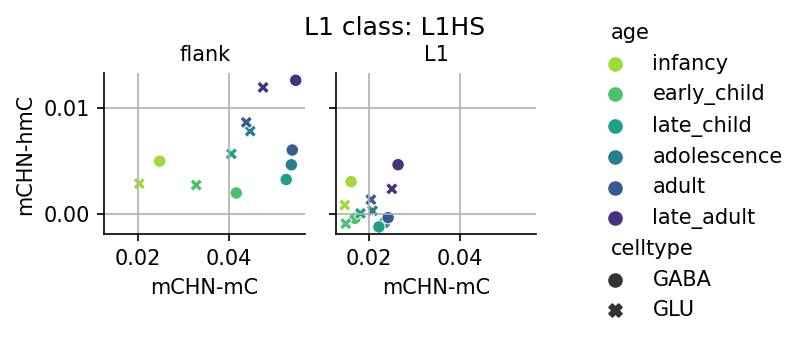

In [63]:
class_show='L1HS'
dfu_show=dfu_mean.stack()
dfu_show.index.names=['ctxt', 'celltype', 'L1 class', 'bin', 'age']
dfu_show.name='mC'
dfu_show=dfu_show.loc[(slice(None),slice(None),class_show)].reset_index()

dfu_show['region'] = pd.cut(dfu_show['bin'], [-10000,-5000,0,6000], labels=['flank','upstream','L1'])
dfu_show=dfu_show.groupby(['region','ctxt','celltype','age',])['mC'].mean()
dfu_show=dfu_show.unstack('ctxt')

for x,ctxt in enumerate(['CG','CH']):
  g=sns.relplot(data=dfu_show,
              x=f'm{ctxt}N-mC',y=f'm{ctxt}N-hmC',
              kind='scatter',
              col='region',col_order=['flank','L1'],
  #             col='celltype',
              style='celltype',
                linestyle='-',
              height=2,aspect=1,
                facet_kws={'margin_titles':True,},
              hue='age',hue_order=age_periods.keys(),palette='viridis_r')
  g.set_titles(row_template='{row_name}',col_template='{col_name}')
  g.tight_layout()
  g.fig.suptitle(f'L1 class: {class_show}',y=1.02)
  [ax.grid(True) for ax in g.axes.flatten()];
  g.fig.set_dpi(150)
  plt.savefig(f'./{TE}_mC_{class_show}{x}.svg',dpi=300)


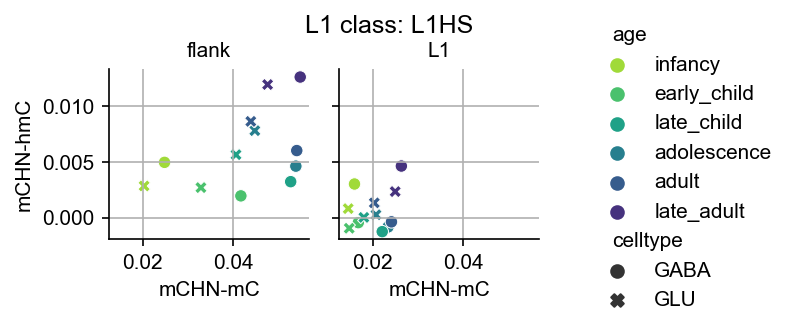

In [82]:
class_show='L1HS'
dfu_show=dfu_mean.stack()
dfu_show.index.names=['ctxt', 'celltype', 'L1 class', 'bin', 'age']
dfu_show.name='mC'
dfu_show=dfu_show.loc[(slice(None),slice(None),class_show)].reset_index()

dfu_show['region'] = pd.cut(dfu_show['bin'], [-10000,-5000,0,6000], labels=['flank','upstream','L1'])
dfu_show=dfu_show.groupby(['region','ctxt','celltype','age',])['mC'].mean()
dfu_show=dfu_show.unstack('ctxt')

for ctxt in ['CG','CH']:
  g=sns.relplot(data=dfu_show,
              x=f'm{ctxt}N-mC',y=f'm{ctxt}N-hmC',
              kind='scatter',
              col='region',col_order=['flank','L1'],
  #             col='celltype',
              style='celltype',
                linestyle='-',
              height=2,aspect=1,
                facet_kws={'margin_titles':True,},
              hue='age',hue_order=age_periods.keys(),palette='viridis_r')
  g.set_titles(row_template='{row_name}',col_template='{col_name}')
  g.tight_layout()
  g.fig.suptitle(f'L1 class: {class_show}',y=1.02)
  [ax.grid(True) for ax in g.axes.flatten()];
  g.fig.set_dpi(150)


In [149]:
L1_order=rmsk.groupby('L1 class')['evolutionary age'].mean().sort_values().index[::-1]
# L1_order=L1_order[:15]
fig,axs=plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,3))
for ctxt,ax,vmax in zip(['mCGN','mCHN'],axs,[1,0.07]):
  sns.heatmap(dfu_mean[(ctxt,'L2-4IT_CUX2')].unstack('bin').loc[L1_order[:20]],
  #             vmin=.6,vmax=1
              vmax=vmax,
              yticklabels=True,
              cmap='viridis_r',
              ax=ax)
  ax.set_title(ctxt)


In [118]:
df_show=dfu_mean.loc[(slice(None),'L2-4IT_CUX2')]

In [123]:
%%time
# Line plots of mean mC in bins around the L1 sites
g=sns.relplot(df_show.reset_index(),x='bin',y=0,kind='line',
            hue='Age',
              hue_order=['Young','Aged'],
            col='ctxt',
            row='L1 class',
              row_order=L1_order,
#               row_order=['L2-4IT_CUX2',
#                                       'MGE_SST', 'L4-5IT_RORB_ARHGAP15'
#                                      ],
            facet_kws={'sharey':False,'margin_titles':True,},
            height=1.5,aspect=3,
#        'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15','CGE_ADARB2_ADAM33','MGE_PVALB', 'MGE_SST',]
           )
g.set_titles(row_template='{row_name}')
g.tight_layout()
[ax.set_xlabel('Location rel. L1 (bp)') for ax in g.axes.flatten()]
[ax.set_ylabel('mC') for ax in g.axes.flatten()]
[ax.grid(True) for ax in g.axes.flatten()];

CPU times: user 6.8 s, sys: 243 ms, total: 7.04 s
Wall time: 6.71 s


In [ ]:
def show_heatmap(data,**kws):
#   df_show=dfu_mean.loc[(ctxt,celltype,slice(None),slice(None))].unstack('bin')
#   df_show=df_show.loc[L1_order,:]

  df_show = data.set_index(['bin','L1 class']).iloc[:,-1].unstack('bin')
  df_show=df_show.sort_index(axis=1)
  ax=plt.gca()
  sns.heatmap(data=df_show,
              ax=ax,
#               vmax=0,
#               vmin=0,
              yticklabels=True,**kws)

In [ ]:
dfu_show=dfu_mean.reset_index()
dfu_show=dfu_show[dfu_show['L1 class'].isin(L1_order)]

g=sns.FacetGrid(data=dfu_show,
                row='celltype',col='ctxt',
                row_order=['L2-4IT_CUX2',
       'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15','CGE_ADARB2_ADAM33','MGE_PVALB', 'MGE_SST',]
               )
g.map_dataframe(show_heatmap)

In [ ]:
sns.relplot(data=df_show.T,kind='line',legend=True)

In [ ]:
dfu_TE = dfu[[TE,f'No{TE}',
              f'Coverage-{TE}',f'Coverage-No{TE}'
             ]].dropna()
nshow = dfu_TE.index.get_level_values(f'{TE}_id').nunique()

In [ ]:
%%time
# Coarse-grain the original bins (128bp)
binsize_show = 128

dfu_TE_show=dfu_TE.copy()
dfu_TE_show=dfu_TE_show.stack().reset_index().rename(columns={0:'mC','sample':f'{TE} status'})
dfu_TE_show['bin_resample']=np.floor(dfu_TE_show['bin']/binsize_show)*binsize_show
dfu_TE_show_median = dfu_TE_show.groupby(['bin_resample',f'{TE} status','celltype','ctxt'])[['mC']].median()
dfu_TE_show_mean = dfu_TE_show.groupby(['bin_resample',f'{TE} status','celltype','ctxt'])[['mC']].mean()

In [ ]:
# Calculate the difference between Alu and NoAlu
dfu_TE_show_mean=dfu_TE_show_mean.unstack(f'{TE} status')
dfu_TE_show_mean[('mC','Diff')]=dfu_TE_show_mean[('mC',TE)]-dfu_TE_show_mean[('mC',f'No{TE}')]
dfu_TE_show_mean=dfu_TE_show_mean.stack(f'{TE} status')

dfu_TE_show_median.index=dfu_TE_show_median.index.reorder_levels([f'{TE} status','celltype','ctxt','bin_resample'])
dfu_TE_show_mean.index=dfu_TE_show_mean.index.reorder_levels([f'{TE} status','celltype','ctxt','bin_resample'])

In [ ]:
dfu_TE_show_mean

In [ ]:
%%time
g=sns.relplot(dfu_TE_show_mean.loc[[TE,f'No{TE}']],kind='line',
# g=sns.relplot(dfu_TE_show,
              x='bin_resample',y='mC',
#               hue='celltype',style=f'{TE} status',
              hue=f'{TE} status',palette={TE:'r',f'No{TE}':'k'},
              height=2,aspect=3,row='ctxt',
              legend=True,
              facet_kws={'sharey': False, 'sharex': True},
              errorbar=('ci',95)
             )
[ax.grid(True) for ax in g.axes.flatten()]
g.fig.suptitle(f'Average over {TE} insertions ({nshow} events)',y=1.02)

In [ ]:
plt.xlim([-8e3,8e3])
plt.savefig(f'Plots/mC_profile_{TE}_lineplots.pdf')

In [ ]:
# g.fig.suptitle(f'Average over full length insertions ({TE_bed.shape[0]} events)',y=1.02)
# g.fig

In [ ]:
for xl in [5000,1000]:
  g.axes[0,0].set_xlim([-xl,xl])
  g.fig.savefig(f'Plots/KNRGL_{TE}_mean_mC_ErrorBars_xlim{xl//1000}kbp.pdf')

In [ ]:
celltypes=dfu_TE_show_mean.reset_index()['celltype'].unique()
cellclass = {c:'Exc' for c in celltypes if c[0]=='L'}
cellclass.update({c:'Glia' for c in celltypes if 'Glia' in c})
cellclass.update({c:'Inh' for c in celltypes if 'CGE' in c or 'MGE' in c})
palette = {'Exc':'g','Inh':'r','Glia':'gray'}

In [ ]:
dfu_TE_show_mean['cell class']=dfu_TE_show_mean.index.get_level_values('celltype').map(cellclass)
dfu_TE_show_mean=dfu_TE_show_mean.reset_index().set_index([f'{TE} status','celltype','ctxt','cell class','bin_resample'])

In [ ]:
dfu_TE_show_mean_mean = dfu_TE_show_mean.groupby([f'{TE} status','ctxt','cell class','bin_resample']).mean()

In [ ]:
# Separate lineplots for each celltype
g=sns.relplot(100*dfu_TE_show_mean_mean.loc['Diff'],kind='line',
              x='bin_resample',y='mC',
              hue='cell class',
#               palette=palette,
              height=2,aspect=3,row='ctxt',
              legend=True,palette=palette,hue_order=['Exc','Inh','Glia'],
             facet_kws={'sharey': False, 'sharex': True})
[ax.grid(True) for ax in g.axes.flatten()]
[ax.set_ylabel(f'Difference in %mC\n({TE} - No TE)') for ax in g.axes.flatten()]
plt.xlim([-1e4,1e4])
g.fig.suptitle(f'Average over {TE} insertions ({nshow} events)',y=1.02)

In [ ]:
dfu_TE_show_mean

In [ ]:
%%time
g=sns.relplot(dfu_TE_show_mean.loc[[f'Coverage-{TE}',f'Coverage-No{TE}']],kind='line',
              x='bin_resample',y='mC',
#               hue='celltype',style=f'{TE} status',
              hue=f'{TE} status',palette={f'Coverage-{TE}':'r',f'Coverage-No{TE}':'k'},
              height=2,aspect=3,row='ctxt',col='cell class',legend=True,
              facet_kws={'sharey': False, 'sharex': True},
              errorbar=('ci',95)
             )
[ax.grid(True) for ax in g.axes.flatten()]
[ax.set_ylabel('Coverage') for ax in g.axes.flatten()]
for xl in [8000]:
  g.axes[0,0].set_xlim([-xl,xl])
  g.fig.savefig(f'Plots/KNRGL_{TE}_mean_Coverage_ErrorBars_xlim{xl//1000}kbp.pdf')

In [ ]:
[ax.set_ylabel('Coverage (C basecalls)') for ax in g.axes.flatten()]
g.axes[0,0].set_xlim([-10000,10000])
g.fig.savefig('Plots/KNRGL_mean_Coverage_ErrorBars.pdf')
g.fig


In [ ]:
neuron_types=['CGE_ADARB2_ADAM33', 'CGE_LAMP5', 'CGE_LAMP5_LHX6', 'CGE_VIP',
       'L2-4IT_CUX2', 'L3-5IT_RORB_PLCH1',
       'L4-5IT_RORB_ARHGAP15', 'L4-5IT_RORB_LRRK1', 'L4-5IT_RORB_TSHZ2',
       'L56NP_TLE4_TSHZ2', 'L6CT_TLE4_FAM95C', 'L6IT_THEMIS_CUX1',
       'L6IT_THEMIS_LINC00343', 'L6b_TLE4_NXPH4', 'MGE_PVALB', 'MGE_SST',
       'MGE_SST_CLMP', 'CGE_PAX6']

In [ ]:
dfu_TE_show['bin_resample']=dfu_TE_show['bin_resample'].astype(int)

# df_curr= dfu_TE_show[dfu_TE_show['bin_resample']==-1024].groupby(['ctxt','celltype',f'{TE} status','TE_id'])[['mC']].mean()
df_curr= dfu_TE_show[(dfu_TE_show['bin_resample']<=1500)&(dfu_TE_show['bin_resample']>=-1500)]
df_curr = df_curr.loc[(df_curr['bin']%512)==0]
df_curr['cell class']=df_curr['celltype'].map(cellclass)

df_curr=df_curr.groupby(['ctxt','cell class','bin_resample',f'{TE} status',f'{TE}_id',])['mC'].mean()

# df_curr=df_curr.loc[('mCHN',neuron_types),:]['mC']
# df_curr['bin_resample']=df_curr['bin_resample'].astype(str)
# df_curr=df_curr.set_index([f'{TE} status','bin_resample','TE_id'])
df_curr=df_curr.unstack(f'{TE} status')

df_curr['diff']=df_curr[TE]-df_curr[f'No{TE}']
# df_curr['diff']=(df_curr[TE]+.01)/(df_curr[f'No{TE}']+.01)
df_curr=df_curr.loc['mCHN']

In [ ]:
df_curr=df_curr.groupby([f'{TE}_id','cell class','bin_resample']).mean()

In [ ]:
sns.boxplot(data=df_curr.reset_index(['bin_resample','cell class']),x='bin_resample',y='diff',fliersize=0,hue='cell class',
           hue_order=['Exc','Inh'])
plt.xticks(rotation=90);
plt.ylim([0,2])

In [ ]:
# Scatter plots for each bin relative to the L1 location
g=sns.relplot(data=df_curr,
            x=TE,y=f'No{TE}',
#             kind='point',native_scale=True,
#             row='celltype',
            col='bin_resample',
              row='cell class',
              row_order=['Exc','Inh','Glia'],
              height=2,s=2,hue='cell class',palette=palette,
#             facet_kws={'sharey': False, 'sharex': False},
           )
g.set_titles(template="bin={col_name}bp")
plt.xlim([0,.2])
[ax.plot(ax.get_xlim(),ax.get_xlim(),'k--') for ax in g.axes.flatten()];
[ax.grid(True) for ax in g.axes.flatten()];

In [ ]:
interesting_TEs=df_curr.loc[(slice(None),'Exc',0)].sort_values('diff').index[:10]
TE_bed[TE_bed['TE_id'].isin(interesting_TEs)]

In [ ]:
# dfu.loc[locus,TE]=np.nanmean(dfu.loc[locus,pos_samples],axis=1)
# dfu.loc[locus]
dfu.loc[locus,pos_samples].mean(axis=1)
dfu.loc[locus,TE]

In [ ]:
df_diffs=[]
for locus in loci_show:
  # dfu=df.loc[:,(ctxt_show,slice(None),celltypes_show)]
  dfu=group_samples(locus,
                    df,
                    TE_bed)

  dfu=dfu.reorder_levels(['has_TE','ctxt','celltype'],axis=1)
  dfu_diff=dfu[f'No{TE}']-dfu[TE]
  dfu_diff['TE_id']=locus
  dfu_diff=dfu_diff.reset_index().set_index(['bin','TE_id'])
  break
dfu_diff

In [ ]:
for a in dfu:
  print(a)

In [ ]:
hl

In [ ]:
TE_bed[TE_bed['TE_id']==locus]

In [ ]:
loci_show

In [ ]:
def plot_mc(df,
            locus,
            TE_bed=TE_bed,
            celltypes_show = ['L4-5IT_RORB_TSHZ2', 'L4-5IT_RORB_LRRK1','L2-4IT_CUX2'],
            ctxt_show=['mCGN'],
            yspace=1):

#   dfu=df.loc[:,(ctxt_show,slice(None),celltypes_show)]
  
  dfu=group_samples(locus,df,TE_bed)
  locus_info=TE_bed[TE_bed['TE_id']==locus].iloc[0]
  
  # Make a plot showing the mC level for each cell type for L1 vs. no-L1
  fig,axs=plt.subplots(1,len(ctxt_show),squeeze=False)
  hl={}
  for ax,ctxt in zip(axs.flatten(),ctxt_show):
    for j,celltype in enumerate(celltypes):
      for color,l1 in zip(['r','k'],[TE,f'No{TE}']):
        dfuu=dfu.loc[:,(ctxt,l1,celltype)]
        hl[l1]=ax.plot(dfuu+j*yspace,color=color,label=l1)
    ax.set_ylabel('Celltypes')
    ax.set_yticks(np.arange(len(celltypes))*yspace+yspace/2,labels=celltypes)
    ax.grid(axis='x')
    ax.set_xlim([dfuu.index.min(),dfuu.index.max()])
    ax.set_title(locus_info['TE_id']+': '+locus_info['samples']+
                 f'\n{locus_info["chr"]}:{locus_info["start"]}-{locus_info["end"]} {locus_info["strand"]}')

    ax.legend(hl[TE]+hl[f'No{TE}'],[TE,f'No{TE}'])
    
  return axs

axs=[]
for i,locus in enumerate(loci_show.iloc[:10]):
  ax=plot_mc(df,locus)
  axs.append(ax)


In [ ]:
%%time
dfu=dfu.stack(['ctxt','celltype','has_TE']).reset_index().rename(columns={0:'mC'})
g=sns.relplot(dfu, 
            x='bin',y='mC',
            kind='line',
            col='celltype',col_wrap=4,
            hue='has_TE',palette={TE:'r',f'No{TE}':'k'},
            height=3
           )
[ax.grid(True) for ax in g.axes]

In [ ]:
x=dfu.columns.to_frame()
x['ctxt']='asdf'
dfu.columns=pd.MultiIndex.from_frame(x)
dfu

In [ ]:
celltypes